### Урок 3. Классификация. Логистическая регрессия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
X.shape

(4, 10)

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [10]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [11]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

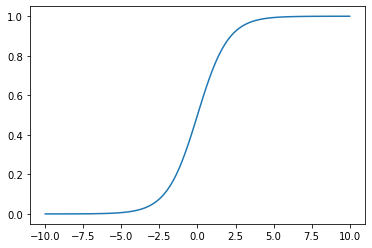

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.765117774502237
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442177
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.553273778823678


## Д/з

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [18]:
def calc_logloss1(y, y_pred):
    err=0
    for i in range(y.shape[0]):
        if y_pred[i]==0:
            err = - ((1.0 - y) * np.log(1.0 - y_pred[i])) # но тут np.log даст 0 и смысла нет в выражении, только уйти от подлогарифменного нуля
            err += err 
        elif y_pred[i]==1:
            err = - (y[i] * np.log(y_pred[i])) # и тут np.log даст 0
            err += err
        else:
            err = - (y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i]))
            err += err
    return err/y.shape[0]

In [19]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss1(y1, y_pred1)

0.10536051565782628

In [20]:
y2 = np.array([1, 0, 0, 1])
y_pred2 = np.array([0.9, 0., 0.3, 0.8])
calc_logloss1(y2, y_pred2)

0.11157177565710485

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [21]:
W = eval_model(X_st, y, iterations=15000, alpha=2.2)

1500 [-21.4516798   -2.31693877  -5.58437331  17.81437033] 0.15776562197097233
3000 [-28.88864422  -2.98903073  -7.70504912  23.8510647 ] 0.1280059258845837
4500 [-34.16725546  -3.46499793  -9.19534417  28.11800225] 0.11320687572295525
6000 [-38.36028669  -3.83821858 -10.37803964  31.49077902] 0.10393493577137647
7500 [-41.90801174  -4.14826509 -11.38166236  34.32926876] 0.09733231219129146
9000 [-45.0311676   -4.41531016 -12.26950606  36.81402655] 0.09223901309214029
10500 [-47.85528553  -4.650971   -13.0770986   39.04785147] 0.0880922672405285
12000 [-50.45815179  -4.86255516 -13.82619633  41.09460262] 0.08458425591088099
13500 [-52.8910125   -5.05498888 -14.53094727  42.9965514 ] 0.08153153811750721
15000 [-55.18918274  -5.2317898  -15.20094675  44.78305849] 0.07881758518587897


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [22]:
def calc_pred_proba(W, X):
    y_pred_proba = 1 / (1 + np.exp(-np.dot(W, X)))
    return y_pred_proba

In [23]:
calc_pred_proba(W, X_st)

array([3.21426621e-01, 8.95718856e-04, 1.00000000e+00, 1.68063422e-11,
       9.77922559e-01, 7.24566191e-03, 1.00000000e+00, 5.01423114e-03,
       6.94282567e-01, 1.00000000e+00])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [24]:
def calc_pred(W, X):
    y_pred = calc_pred_proba(W, X)
    for i in range(y_pred.shape[0]):
        if y_pred[i]>=0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
    return y_pred

In [25]:
calc_pred(W, X_st)

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [26]:
def accuracy(y, y_pred):
    ACC = 0
    for i in range(y.shape[0]):
        if y_pred[i]==y[i]:
            ACC+=1
    return ACC

In [28]:
y_pred_class = calc_pred(W, X_st)

In [29]:
accuracy(y, y_pred_class)

10

In [30]:
def confusion_matrix (y, y_pred):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(y.shape[0]):
        if y_pred[i]==y[i]==1:
            TP +=1
        elif y_pred[i]==y[i]==0:
            TN+=1
        elif y_pred[i]== 1 and y[i]==0:
            FP+1
        else:
            FN +=1
    return TP, TN, FP, FN

In [31]:
confusion_matrix (y, y_pred_class)

(5, 5, 0, 0)

In [32]:
def precision(y, y_pred):
    TP, TN, FP, FN = confusion_matrix(y, y_pred)
    return TP/(TP+FP)

In [33]:
precision(y, y_pred_class)

1.0

In [34]:
def recall(y, y_pred):
    TP, TN, FP, FN = confusion_matrix(y, y_pred)
    return TP/(TP+FN)

In [35]:
recall(y, y_pred_class)

1.0

In [36]:
def f_1(y, y_pred):
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    return 2*p*r/(p+r)

In [37]:
f_1(y, y_pred_class)

1.0

6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться, потому что очень маленькая выборка и слишком хорошо (судя по точности и полноте) подогнана модель.